## Connecting to the Twitter API 

In [5]:
import oauth2 as oauth
import json

In [6]:
with open('config1.json') as file:
    tokens = json.loads(file.read())

# read the consumer keys and secret
consumer = oauth.Consumer(key = tokens['CONSUMER_KEY'] , secret = tokens['CONSUMER_SECRET'])

# read the tokens key and secret
token = oauth.Token( key = tokens['ACCESS_TOKEN'] , secret = tokens['ACCESS_SECRET'])

#create a client object
client = oauth.Client(consumer,token)

client

### Twitter's REST APIs

Twitter has a rich set of API calls (full list is listed at https://dev.twitter.com/rest/public). Today we'll be using these:

* [GET friends/list](https://dev.twitter.com/rest/reference/get/friends/list) - who is user X is following?
* [GET followers/list](https://dev.twitter.com/rest/reference/get/followers/list) - who follows user X?



### GET followers/list: let's find out who follows you!

You'll see from the [GET followers/list](https://dev.twitter.com/rest/reference/get/followers/list) documentation that the URL to get the list of followers is:

    https://api.twitter.com/1.1/followers/list.json?screen_name=[screen_name]
    
Which returns:

1) A response body

* JSON representing the data we requested

2) A response header

* There's a lot of stuff here, but one param to note are the **HTTP Response Codes**, which will tell you if the request was successful. Or if not, why. The ones you should note are:

* **200** - **STATUS_OKAY** - <font color="#009900">Success :) </font>. This is what you want.
* **429** - **RATE_LIMIT_EXCEEDED**. <font color="#990000">Uh-oh, slow it down :/</font>. Twitter limits how frequently you can make requests, and you've exceeded it.
* **401** - **UNAUTHORIZED_USER**. Twitter isn't accepting your Consumer/Access tokens. Verify tokens were pasted correctly, or try generating new tokens.

&nbsp;
 
Now that we know what to expect, let's try it!

In [7]:
import json


In [9]:
FOLLOWERS_URL = 'https://api.twitter.com/1.1/followers/list.json'

#twitter handle
screen_name = 'donwan2011'

url = FOLLOWERS_URL+'?screen_name='+screen_name

header , response  = client.request(url,method='GET')

In [10]:
print('status:',header['status'])

status: 200


In [11]:
print(response[:600])

b'{"users":[{"id":336519357,"id_str":"336519357","name":"StepheTsatsu Anyigba","screen_name":"Kadinale","location":"Ghana","description":"Gentleman, loves choral music and investments. Also into health care and events management.","url":null,"entities":{"description":{"urls":[]}},"protected":false,"followers_count":163,"friends_count":660,"listed_count":1,"created_at":"Sat Jul 16 12:45:35 +0000 2011","favourites_count":16,"utc_offset":null,"time_zone":null,"geo_enabled":false,"verified":false,"statuses_count":603,"lang":"en","status":{"created_at":"Tue Dec 15 09:31:30 +0000 2015","id":6766960730'


## Working with Twitter Retweets Data

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [17]:
import os
os.listdir()

['.DS_Store',
 '.git',
 '.ipynb_checkpoints',
 '__pycache__',
 'Analyzing Graphs.ipynb',
 'circos.py',
 'circular.png',
 'comm.py',
 'config.json',
 'config1.json',
 'Course Intro.ipynb',
 'Creating Graphs.ipynb',
 'degree_histogram.png',
 'Documentations.ipynb',
 'Drawing Graphs.ipynb',
 'edge.txt',
 'edge_colormap.png',
 'Exceptions in NetworkX.ipynb',
 'facebook_combined.txt',
 'football',
 'four_grids.png',
 'fr.png',
 'friend_relationships',
 'friends',
 'Graph Generators.ipynb',
 'Graph.ipynb',
 'graph.png',
 'grids.png',
 'house_with_colors.png',
 'isp-ss.png',
 'list.PyTennessee.json',
 'Live Coding.ipynb',
 'Max-Flow-Min-Cut-Problem.ipynb',
 'MaxFlow-MinCut-Problem.ipynb',
 'mayavi.png',
 'Modeling Networks Like Twitter.ipynb',
 'my_followers.json',
 'node_cm.png',
 'node_cmap.png',
 'node_colormap.png',
 'NYC_Social_Media_Usage.csv',
 'Overview of NetworkX.ipynb',
 'path.gpickle',
 'Political_blogs_colored.png',
 'python_louvain.egg-info',
 'random.png',
 'retweets.txt',
 'se

In [18]:
#create the retweets file object
edgelist_txt = 'retweets.txt'

G = nx.read_edgelist(edgelist_txt,create_using=nx.DiGraph())

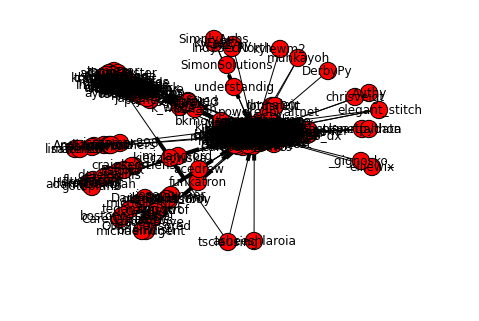

In [19]:
nx.draw(G,with_labels=True)

In [20]:
LAYOUTS = {
         'circular':nx.circular_layout,
         'fr':nx.fruchterman_reingold_layout,
         'random':nx.random_layout,
         'shell':nx.shell_layout,
         'spectral':nx.spectral_layout,
         'spring':nx.spring_layout
}

In [21]:
def save_layout(G, layout_name):
    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1.5]
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1.5]
    nlarge=[n for n in G.nodes() if n in ['PyTennessee']]
    pos=LAYOUTS[layout_name](G) # positions for all nodes

    print (nlarge)
    # nodes
    nx.draw_networkx_nodes(G,pos,nodelist=nlarge,node_size=1)

    # edges
    nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
    nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.5,edge_color='#cccccc')

    # labelsM
    labels={}
    labels['PyTennessee']='PyTennessee'
    nx.draw_networkx_labels(G,pos,labels,font_size=6)
    #nx.draw_networkx_labels(G,pos,nodelist=nlarge,font_size=6,font_family='sans-serif')
    
    
    plt.axis('off')
    plt.figure(figsize=(20,10))
    plt.savefig(layout_name + '.png', dpi=500)
    

['PyTennessee']


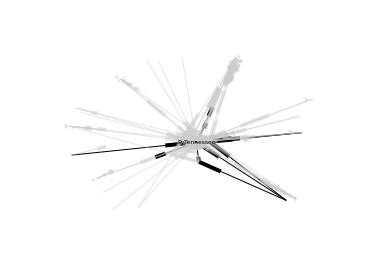

In [22]:
# print the spring layout
save_layout(G,'spring')

['PyTennessee']


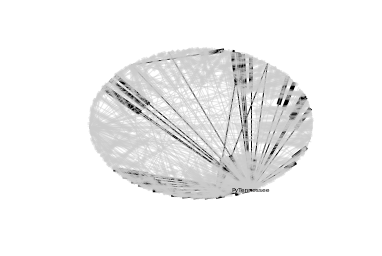

In [23]:
#print the shell layout
save_layout(G,'shell')

['PyTennessee']


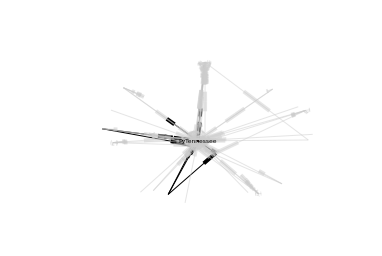

In [24]:
#print the fr layout
save_layout(G,'fr')

['PyTennessee']


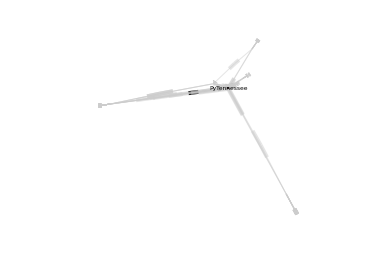

In [25]:
#print the spectral
save_layout(G,'spectral')

['PyTennessee']


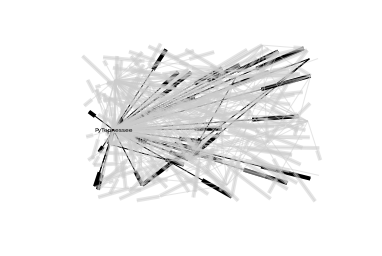

In [26]:
#print the random layout
save_layout(G,'random')

['PyTennessee']


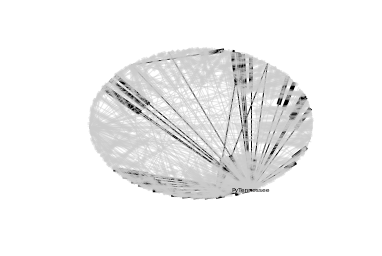

In [27]:
#print the circular layout
save_layout(G,'circular')